数据集分析

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import random
from collections import Counter

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

一. 配置数据集路径

In [2]:
# 假设此脚本与 TRAIN 和 TEST 文件夹在同一目录下
base_dir = '.' 
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

print(f"训练集路径: {train_dir}")
print(f"测试集路径: {test_dir}\n")

训练集路径: .\TRAIN
测试集路径: .\TEST



分析指定目录下的图像数据集。

In [ ]:
def analyze_dataset(data_dir):
    """
    分析指定目录下的图像数据集。
    
    参数:
    data_dir (str): 数据集目录的路径 (例如, './TRAIN')
    
    返回:
    pandas.DataFrame: 包含每个类别信息 (类别名, 图片数量, 尺寸列表) 的DataFrame
    """
    if not os.path.isdir(data_dir):
        print(f"目录 '{data_dir}' 不存在。")
        return None
        
    class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
    num_classes = len(class_names)
    
    data = []
    image_dimensions = []
    
    print(f"开始分析目录 {data_dir}")
    
    for class_name in tqdm(class_names, desc=f"正在处理 {os.path.basename(data_dir)}"):
        class_path = os.path.join(data_dir, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
        num_images = len(image_files)
        
        class_dims = []
        for image_file in image_files:
            try:
                with Image.open(os.path.join(class_path, image_file)) as img:
                    dims = img.size # (width, height)
                    class_dims.append(dims)
                    image_dimensions.append(dims)
            except Exception as e:
                print(f"无法读取图片 {os.path.join(class_path, image_file)}: {e}")

        data.append({
            'ClassName': class_name,
            'Count': num_images,
            'Dimensions': class_dims
        })
        
    df = pd.DataFrame(data)
    print(f"目录分析完成 {data_dir} ")
    
    return df, image_dimensions

train_df, train_dims = analyze_dataset(train_dir)
test_df, test_dims = analyze_dataset(test_dir)

开始分析目录 .\TRAIN


正在处理 TRAIN: 100%|██████████| 27/27 [00:02<00:00, 11.27it/s]


目录分析完成 .\TRAIN 
开始分析目录 .\TEST


正在处理 TEST: 100%|██████████| 27/27 [00:00<00:00, 145.30it/s]

目录分析完成 .\TEST 


打印数据集的摘要信息

In [4]:
def print_summary(df, dimensions, name):
    """打印数据集的摘要信息"""
    if df is None:
        return
        
    print(f"{name} 数据集摘要")
    print(f"总类别数: {len(df)}")
    total_images = df['Count'].sum()
    print(f"总图片数: {total_images}")
    
    # 类别分布统计
    print("各类别样本数量统计:")
    print(df[['ClassName', 'Count']].to_string(index=False))
    
    print(f"样本数量最多的类别: {df.loc[df['Count'].idxmax()]['ClassName']} ({df['Count'].max()} 张)")
    print(f"样本数量最少的类别: {df.loc[df['Count'].idxmin()]['ClassName']} ({df['Count'].min()} 张)")

    # 图像尺寸统计
    if dimensions:
        dim_counts = Counter(dimensions)
        print(f"图片尺寸多样性: 共发现 {len(dim_counts)} 种不同的尺寸。")
        print("最常见的5种尺寸 (宽x高):")
        for dim, count in dim_counts.most_common(5):
            print(f"  - {dim}: {count} 张图片")

print_summary(train_df, train_dims, "训练 (TRAIN)")
print_summary(test_df, test_dims, "测试 (TEST)")

训练 (TRAIN) 数据集摘要
总类别数: 27
总图片数: 2256
各类别样本数量统计:
                 ClassName  Count
           Apple Scab Leaf     78
       Corn Gray leaf spot     61
  Potato leaf early blight    107
   Potato leaf late blight     97
Squash Powdery mildew leaf    125
  Tomato Early blight leaf     86
 Tomato Septoria leaf spot    128
                apple leaf     77
           apple rust leaf     76
          bell pepper leaf     49
     bell pepper leaf spot     54
            blueberry leaf     97
               cherry leaf     45
            corn rust leaf    102
                grape leaf     53
      grape leaf black rot     52
       leaf blight of corn    174
                peach leaf    101
            raspberry leaf    114
             soyabean leaf     54
           strawberry leaf     84
               tomato leaf     50
tomato leaf bacterial spot     98
   tomato leaf late blight    100
  tomato leaf mosaic virus     47
  tomato leaf yellow virus     68
          tomato mold leaf     79


绘制类别分布柱状图

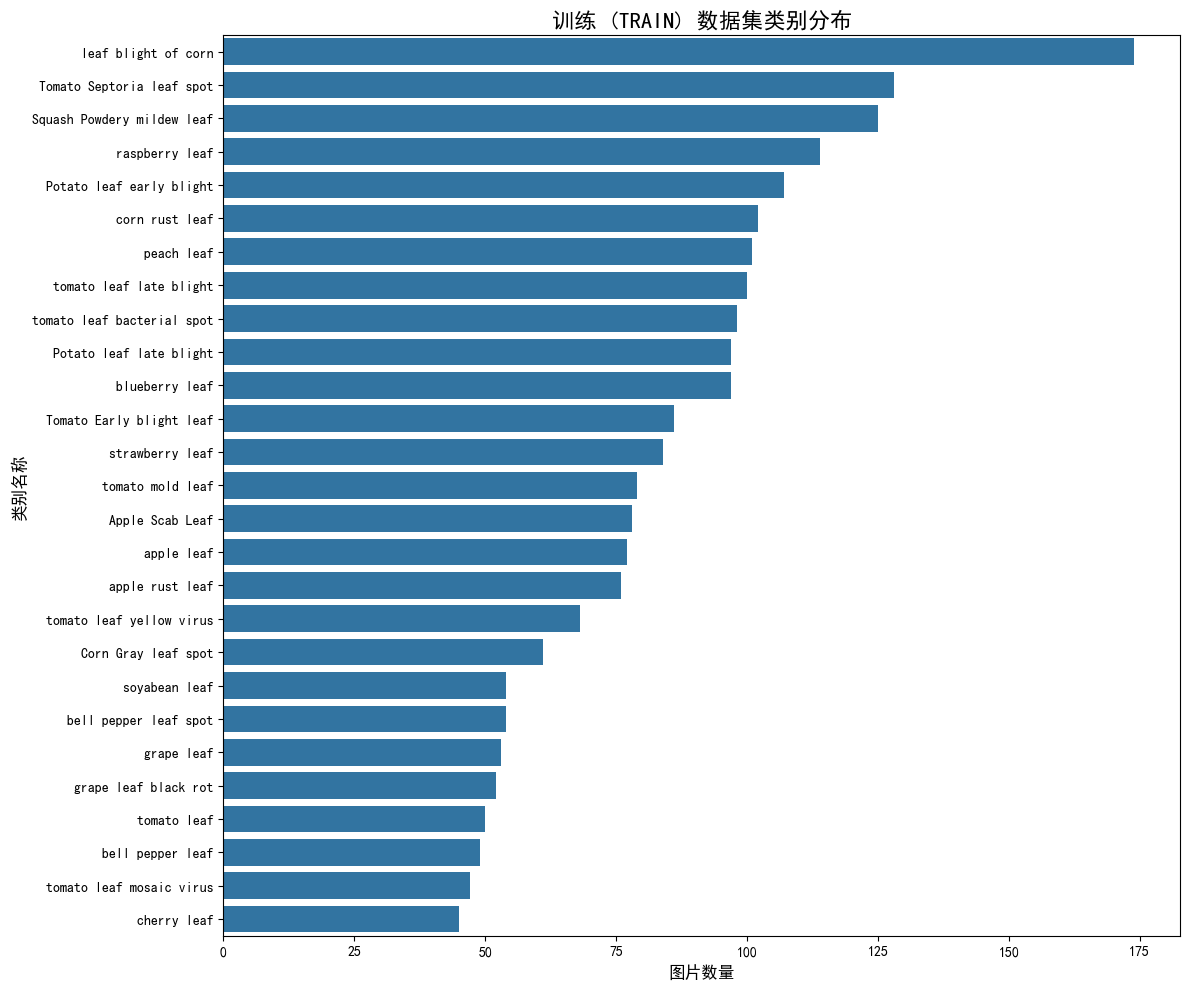

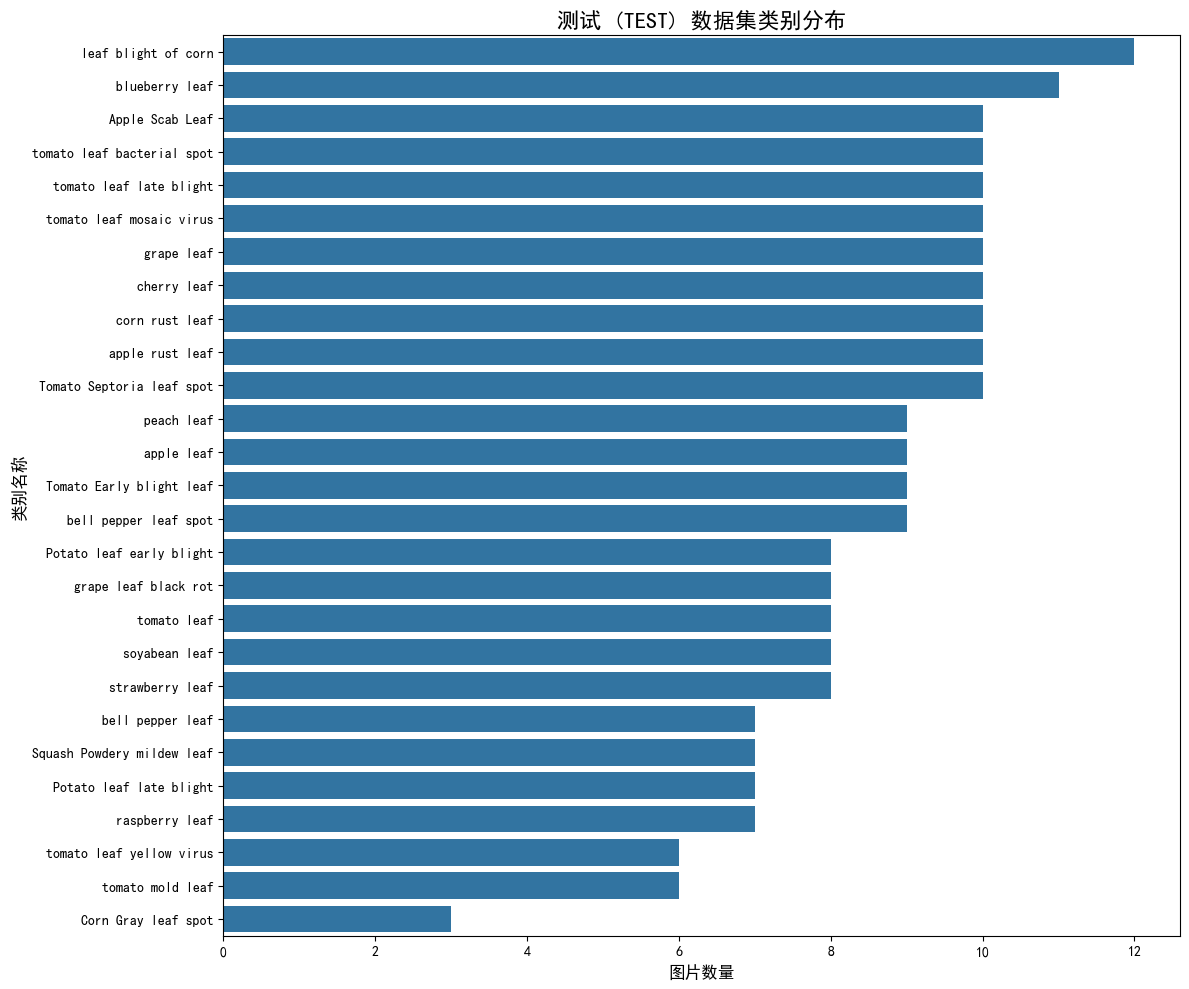

In [5]:
def plot_class_distribution(df, name):
    """绘制类别分布柱状图"""
    if df is None:
        return
        
    plt.figure(figsize=(12, 10))
    sns.barplot(y='ClassName', x='Count', data=df.sort_values(by='Count', ascending=False))
    plt.title(f'{name} 数据集类别分布', fontsize=16)
    plt.xlabel('图片数量', fontsize=12)
    plt.ylabel('类别名称', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_df, "训练 (TRAIN)")
plot_class_distribution(test_df, "测试 (TEST)")


随机展示每个类别的样本图片

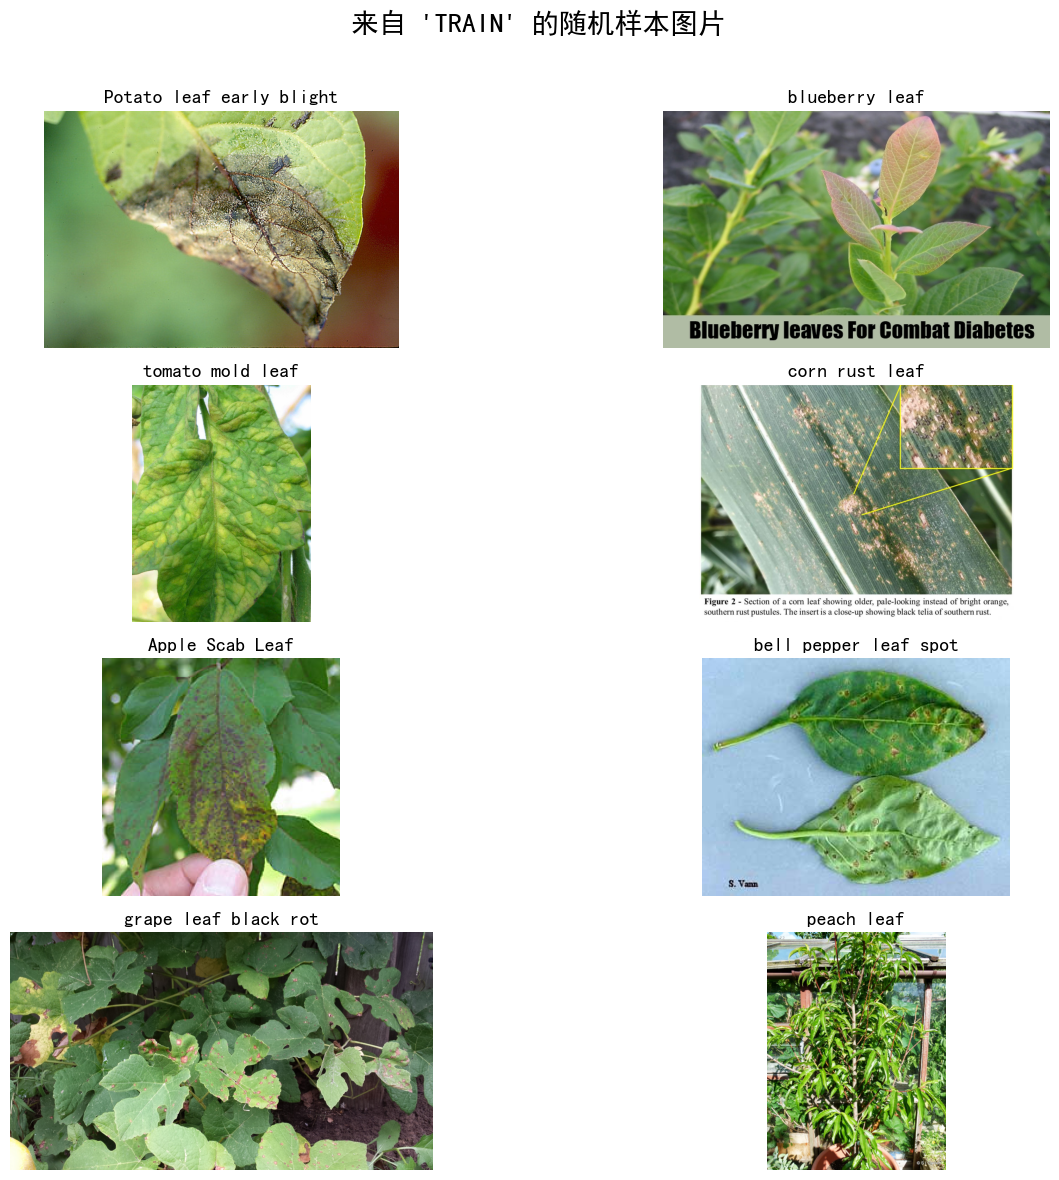

In [ ]:
def show_sample_images(data_dir, num_samples=5):
    """随机展示每个类别的样本图片"""
    if not os.path.isdir(data_dir):
        return
        
    class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
    
    # 随机选择几个类别进行展示，避免图片过多
    if len(class_names) > 8:
        display_classes = random.sample(class_names, 8)
    else:
        display_classes = class_names

    plt.figure(figsize=(15, 12))
    plt.suptitle(f"来自 '{os.path.basename(data_dir)}' 的随机样本图片", fontsize=20)

    for i, class_name in enumerate(display_classes):
        class_path = os.path.join(data_dir, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
        
        if not image_files:
            continue
            
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        
        ax = plt.subplot(4, 2, i + 1)
        image = Image.open(image_path)
        plt.imshow(image)
        ax.set_title(class_name, fontsize=14)
        ax.axis('off')
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

show_sample_images(train_dir)